In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Diabetes

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir si un paciente tiene o no diabetes, basándose en ciertas medidas diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones en la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres mayores de 21 años de herencia india Pima.

## Cargar los datos

Abrir el archivo "diabetes.csv" en la carpeta "data". Analizar su estructura y responder las siguientes preguntas:

*   ¿Cuántas instancias o ejemplos tiene el dataset?
*   ¿Cómo se llama la variable de salida o target? ¿Qué tipo de datos es?
*   ¿Cuántos atributos posee cada instancia o ejemplo?¿Puede detectar datos faltantes en algún atributo?
*   ¿Qué tipo de dato tiene cada atributo?
*   ¿Presenta algún atributo categórico? Si es así, cuántas categorías posee y cuántas instancias tiene en cada categoría.

### ⚠️
Antes de realizar cualquier procesamiento, no olvide de separar los datos en entrenamiento y prueba.

Analice con cuidado el rango de valores de los atributos. ¿Nota valores atípicos a simple vista en algún/algunos de los atributos?

Estos valores atípicos encontrados a simple vista es mejor tratarlos como datos faltantes. Utilice el método **[replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)** de pandas para reemplazarlos por `np.NaN`



Después de realizar el reemplazo, ¿Cuántos datos faltantes presenta cada atributo?

## Datos Faltantes

Grafique el histograma de cada atributo con datos faltantes y decida que valor utilizar (media o mediana) para imputar, en función de la distribución que tienen los datos. Utilice la función **fillna** de pandas ([Documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)).
Puede utilizar el parámetro alpha para darle transparencia a los histogramas y agregar una leyenda para identificar la clase.

### ⚠️
**Aclaración:** Algo a tener en cuenta en este ejemplo es que los atributos pueden tener distribuciones diferentes según la salida o target (con diabetes/ sin diabetes). Una persona sana tendrá un valor de insulina en un rango distinto a una persona no sana. Por tanto es recomendable graficar el histograma por atributo y por clase, de igual manera, calcular la media o mediana según la clase e imputar un valor teniendo en cuenta el mismo criterio.

Si lo deseea puede implementar su propio transformer para imputar datos de forma condicional, dependiendo de la clase y un pipeline para la preparación completa de los datos.

Después de la preparación de datos, entrene 3 clasificadores (KNN, LDA, SVM con kernel gaussiano) y compare sus desempeños (usando la métrica de Accuracy).

In [42]:
# -768 instancias
# -"outcome"
# -10 atributos
# -   0   Unnamed: 0                768 non-null    int64  
#     1   Pregnancies               768 non-null    int64  
#     2   Glucose                   768 non-null    int64  
#     3   BloodPressure             767 non-null    float64
#     4   SkinThickness             756 non-null    float64
#     5   Insulin                   763 non-null    float64
#     6   BMI                       767 non-null    float64
#     7   DiabetesPedigreeFunction  768 non-null    float64
#     8   Age                       768 non-null    int64  
#     9   Outcome                   768 non-null    int64  
# - No


In [43]:
datos = pd.read_csv("./data/diabetes.csv")

In [44]:
datos.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


In [45]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             767 non-null    float64
 4   SkinThickness             756 non-null    float64
 5   Insulin                   763 non-null    float64
 6   BMI                       767 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 60.1 KB


In [46]:
# recuento nan
a = np.isnan(datos).sum()
print (a[a>0])

BloodPressure     1
SkinThickness    12
Insulin           5
BMI               1
dtype: int64


In [47]:
# Division de datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
x = datos.iloc[:, 1:9]
y = datos.Outcome
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=1,  stratify = y)

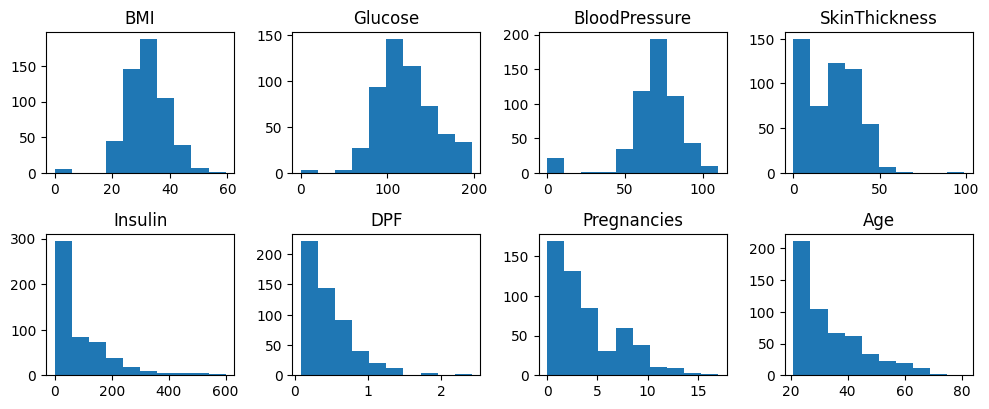

In [48]:
plt.figure(figsize=(10,8))

plt.subplot(4, 4, 1)
plt.hist(X_train.BMI)
plt.title("BMI")

plt.subplot(4, 4, 2)
plt.hist(X_train.Glucose)
plt.title("Glucose")

plt.subplot(4, 4, 3)
plt.hist(X_train.BloodPressure)
plt.title("BloodPressure")

plt.subplot(4, 4, 4) 
plt.hist(X_train.SkinThickness)
plt.title("SkinThickness")

plt.subplot(4, 4, 5)
plt.hist(X_train.Insulin)
plt.title("Insulin")

plt.subplot(4, 4, 6)
plt.hist(X_train.DiabetesPedigreeFunction)
plt.title("DPF")

plt.subplot(4, 4, 7)
plt.hist(X_train.Pregnancies)
plt.title("Pregnancies")

plt.subplot(4, 4, 8)
plt.hist(X_train.Age)
plt.title("Age")

plt.tight_layout()
plt.show()

In [49]:
X_train['Glucose'] = X_train['Glucose'].replace(0, np.NaN)
X_train['BloodPressure'] = X_train['BloodPressure'].replace(0, np.NaN)
X_train['BMI'] = X_train['BMI'].replace(0, np.NaN)
X_train['Age'] = X_train['Age'].replace(0, np.NaN)
X_train['SkinThickness'] = X_train['SkinThickness'].replace(0, np.NaN)
X_train['Insulin'] = X_train['Insulin'].replace(0, np.NaN)
X_train['DiabetesPedigreeFunction'] = X_train['DiabetesPedigreeFunction'].replace(0, np.NaN)


In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Definir las columnas numéricas y categóricas
numeric_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
categorical_features = ['Pregnancies']

# Crear la ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder())
        ]), categorical_features),
    ]
)

# Aplicar el preprocesamiento a los datos de entrenamiento
X_train_processed = preprocessor.fit_transform(X_train)

# Aplicar el mismo preprocesamiento a los datos de prueba
X_test_processed = preprocessor.transform(X_test)



# KNN

In [51]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
sknn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
sknn.fit(X_train_processed, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
y_pred = sknn.predict(X_test_processed)
print((y_pred==y_test).all()) 

False


In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6883116883116883

# LDA

In [54]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train_processed, y_train)

LinearDiscriminantAnalysis(n_components=1)

In [55]:
y_pred = lda.predict(X_test_processed)
print((y_pred==y_test).all())

False


In [56]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# SVM

In [57]:
from sklearn.svm import SVC
# SVM
clf = SVC(kernel="rbf", C=1, gamma=0.01) # a prueba y error encuentro los mejores parametros
clf.fit(X_train_processed, y_train)

SVC(C=1, gamma=0.01)

In [58]:
y_pred = clf.predict(X_test_processed)
print((y_pred==y_test).all())

False


In [59]:
accuracy_score(y_test, y_pred)

0.7445887445887446